In [67]:
import pandas as pd
import seaborn as sb
from sklearn import linear_model
import matplotlib.pyplot as plt

In [68]:
df=pd.read_csv("https://github.com/Lakshay-Gautam764/House-Price-Prediction/raw/main/Dataset.csv")

In [69]:
df.head()

,Location,Sq_Ft,Bedrooms,Bathrooms,Year_Built,Garage,Price
0,Vigyan Nagar,1521,1,1,2016,No,4315847
1,Keshav Pura,2816,3,2,1993,No,8615274
2,Dada bari,2869,3,1,2000,Yes,5360008
3,Dada bari,1285,3,3,2012,No,6412778
4,Nayapura,1171,1,3,2013,No,5405787


In [70]:
df.count()

,0
Location,4996
Sq_Ft,4996
Bedrooms,4996
Bathrooms,4996
Year_Built,4996
Garage,4996
Price,4996


In [71]:
df['Garage'] = df['Garage'].replace({'Yes': 1, 'No': 0})

<ipython-input-71-ced09de502d1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Garage'] = df['Garage'].replace({'Yes': 1, 'No': 0})


In [72]:
df.head()

,Location,Sq_Ft,Bedrooms,Bathrooms,Year_Built,Garage,Price
0,Vigyan Nagar,1521,1,1,2016,0,4315847
1,Keshav Pura,2816,3,2,1993,0,8615274
2,Dada bari,2869,3,1,2000,1,5360008
3,Dada bari,1285,3,3,2012,0,6412778
4,Nayapura,1171,1,3,2013,0,5405787


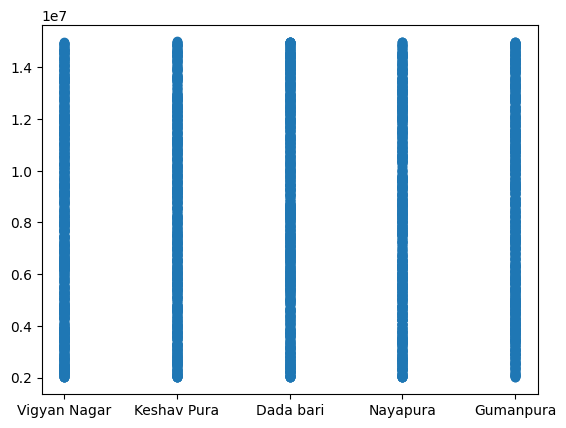

In [73]:
plt.scatter(x='Location', y='Price',data=df)

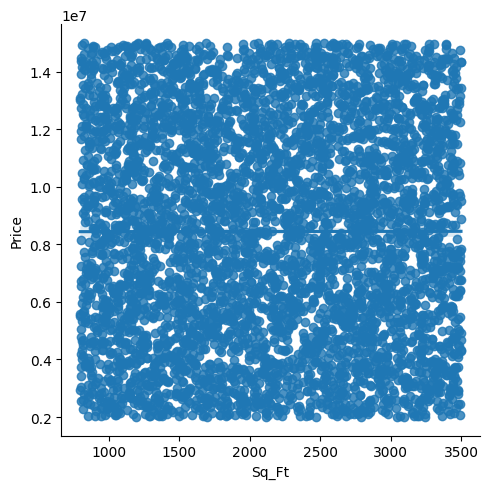

In [74]:
sb.lmplot(x='Sq_Ft',y='Price',data=df)

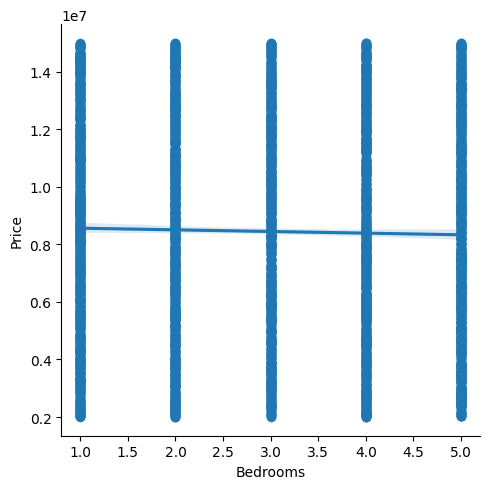

In [75]:
sb.lmplot(x='Bedrooms',y='Price',data=df)

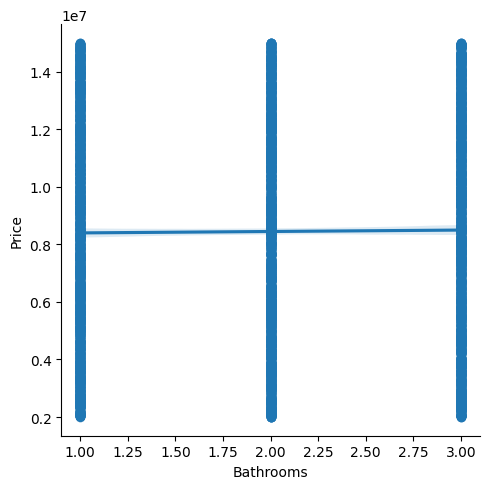

In [76]:
sb.lmplot(x='Bathrooms',y='Price',data=df)

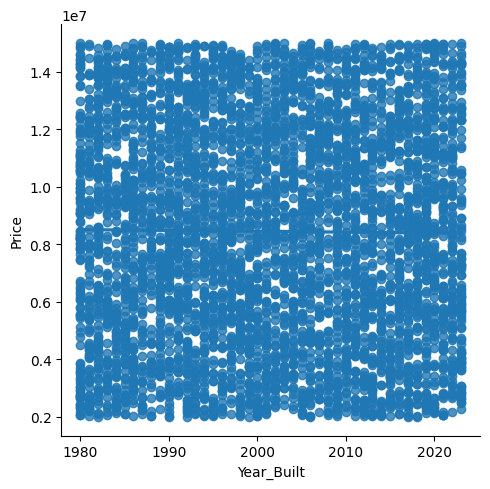

In [77]:
sb.lmplot(x='Year_Built',y='Price',data=df)

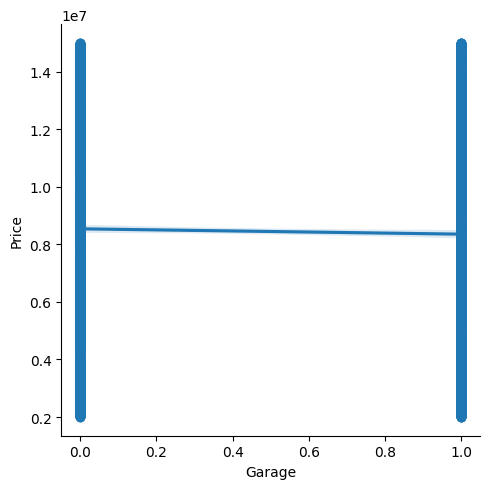

In [78]:
sb.lmplot(x='Garage',y='Price',data=df)

In [79]:
x=df[['Location', 'Sq_Ft', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Garage']].values

In [80]:
x

array([['Vigyan Nagar', 1521, 1, 1, 2016, 0],
       ['Keshav Pura', 2816, 3, 2, 1993, 0],
       ['Dada bari', 2869, 3, 1, 2000, 1],
       ...,
       ['Vigyan Nagar', 1662, 1, 3, 2012, 1],
       ['Vigyan Nagar', 1627, 1, 3, 2015, 0],
       ['Dada bari', 3320, 3, 2, 1981, 1]], dtype=object)

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
label_encoder_x = LabelEncoder()

In [83]:
label_encoder_x.fit_transform(x[:,0])

array([4, 2, 0, ..., 4, 4, 0])

In [84]:
x[:,0]=label_encoder_x.fit_transform(x[:,0])

In [85]:
x

array([[4, 1521, 1, 1, 2016, 0],
       [2, 2816, 3, 2, 1993, 0],
       [0, 2869, 3, 1, 2000, 1],
       ...,
       [4, 1662, 1, 3, 2012, 1],
       [4, 1627, 1, 3, 2015, 0],
       [0, 3320, 3, 2, 1981, 1]], dtype=object)

In [86]:
y=df['Price'].values

In [87]:
y

array([ 4315847,  8615274,  5360008, ...,  3324828, 12353122, 11979036])

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [90]:
x_train

array([[0, 2292, 1, 2, 1983, 1],
       [0, 3302, 1, 3, 2016, 1],
       [2, 2506, 4, 3, 2002, 1],
       ...,
       [1, 2185, 4, 1, 2000, 0],
       [2, 1705, 3, 2, 2002, 1],
       [4, 3455, 2, 3, 2015, 1]], dtype=object)

In [91]:
y_test

array([ 4746589,  8194266,  3756483, 13568019, 13342130,  3661647,
        5271299,  6228099,  2571977, 11936749,  2765599,  5600564,
        6154569,  5871526, 13977976,  3836957,  9443374,  3608082,
        6117519, 10229528,  9428799, 14491151, 13785937, 12619736,
        8080059,  6517107,  4930639,  9062881, 14874193, 13927186,
        4681886,  7592543, 12956369, 12483826,  6858097, 11855115,
       13507897,  6219741, 13257633, 13700876,  4577528,  4986866,
       14055819,  9295537, 11158812, 13097773, 14824597,  5429287,
        4573439, 12082228, 12433453,  5292916,  4862740, 13435961,
        4445368, 14609976,  8768479, 14953070,  6716076,  4994777,
        9562447, 13085218, 12987434, 13905359,  4617154, 12014436,
        9612869,  9874544,  2868185, 13959023, 10168271,  2937010,
        4269678,  2328061, 14237973, 10409727,  8875630, 10550515,
        4873404, 11690902, 11685017, 13963232,  8396929, 12602241,
       10006928, 10173344, 14951767, 13266033, 12750272,  2347

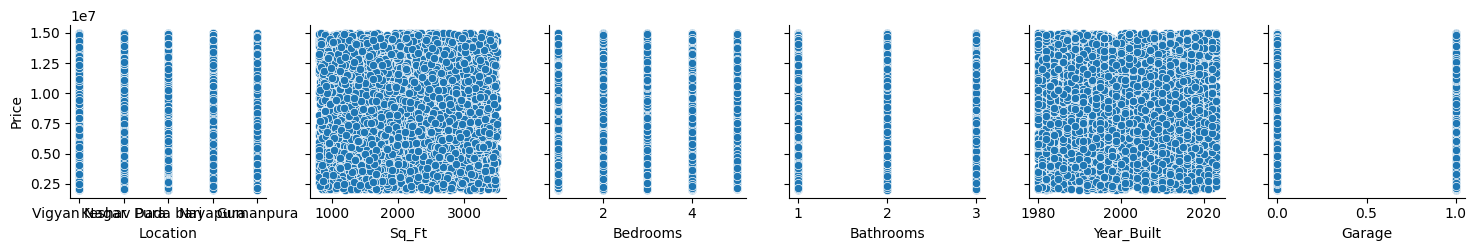

In [92]:
sb.pairplot(x_vars=['Location', 'Sq_Ft', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Garage'],y_vars=['Price'],data=df)

In [93]:
reg=linear_model.LinearRegression()

In [94]:
reg.fit(x_train,y_train)

LinearRegression()

In [95]:
reg.predict(x_test)

array([8398784.28032114, 8496469.78505982, 8422761.09021661,
       8829011.17513952, 8927009.35059296, 8668418.57890116,
       8450776.17826747, 8666986.92479016, 8479864.74878963,
       8728261.55152891, 8560143.89630619, 8393109.78694337,
       8570013.43377429, 8237989.14500815, 8645675.80843269,
       8348221.94485779, 8289489.95280225, 8542928.15990936,
       8487232.23848236, 8508784.07158117, 8953694.53865683,
       8420655.66887826, 8509358.50444792, 8346723.59931818,
       8546384.22953522, 8543779.19454249, 8366358.66577733,
       8335726.32043176, 8632666.2513392 , 8546644.63340844,
       8702373.02050679, 8458243.60665216, 8450477.69395465,
       8796094.55255334, 8529858.24668464, 8609222.29934661,
       8817686.21066352, 8326615.20864557, 8377539.45965552,
       8535746.92727509, 8795881.91712565, 8815147.719194  ,
       8471739.93016853, 8726618.13972353, 8631595.3811924 ,
       8384590.9492939 , 8425448.42297435, 8362302.13143491,
       8394032.70437365,

In [96]:
df

,Location,Sq_Ft,Bedrooms,Bathrooms,Year_Built,Garage,Price
0,Vigyan Nagar,1521,1,1,2016,0,4315847
1,Keshav Pura,2816,3,2,1993,0,8615274
2,Dada bari,2869,3,1,2000,1,5360008
3,Dada bari,1285,3,3,2012,0,6412778
4,Nayapura,1171,1,3,2013,0,5405787
...,...,...,...,...,...,...,...
4991,Dada bari,1994,1,3,2019,1,11557939
4992,Nayapura,2196,4,2,1998,1,2341001
4993,Vigyan Nagar,1662,1,3,2012,1,3324828
4994,Vigyan Nagar,1627,1,3,2015,0,12353122


In [97]:
reg.predict([[2, 1000, 1, 1, 2010, 0]])

array([8626886.87266534])

In [98]:
reg.predict([[2, 1500, 1, 1, 2010, 0]])

array([8638956.29056877])

In [99]:
reg.predict([[2, 2000, 3, 3, 2010, 1]])

array([8306331.40706163])